---
title: 'py50: Single Curve Plot'
author: 'Tony E. Lin'
date: '2023-12-07'
categories: [Python, Streamlit, Coding, Informatics, Plotting]
---

# Generate Single Dose-Response Curve
The following will demo how to calculate the IC50 for a given drug response and generate single dose-response curve.  

This tutorial will use dummy data found under the '../dataset' folder. The calculation requires inputs from a DataFrame. As shown, only specific information is needed to run the calculations. Finally, the information will be plotted on a sigmoidal curve. 

For those interested, this notebook can be found [here](https://github.com/tlint101/practice-in-code/blob/main/notebooks/4-py50-single-plot.ipynb)

And if you are not well versed in python code, good news! I have converted this python app into a web application. You can access it [here](https://py50-app.streamlit.app)

**Note - December 11 Edit:** I shared my package with my classmates and coworkers. All seemed well until someone tried to make a fancy negative sigmoidal curve (from 100% to 0%). I tested my code on my own dataset which has a positive sigmoidal curve (from 0% to 100%). As such, I had to spend time fixing things. It has come out and the next post will address these issues. 

### Example start
First import the modules and the dataset.

In [1]:
import pandas as pd
from py50.calculate import Calculate
from py50.plotcurve import PlotCurve


In [2]:
df = pd.read_csv('datasets/py50/single_example.csv')
df.head()

,Compound Name,Compound Conc,% Inhibition 1,% Inhibition 2,% Inhibition Avg
0,Drug 1,100000.0,90,94,92
1,Drug 1,33300.0,97,89,93
2,Drug 1,11100.0,86,89,88
3,Drug 1,3700.0,81,88,84
4,Drug 1,1240.0,63,70,67


### Calculate IC50

The example dataframe will need to be converted into an instance of the Calculate class. Once converted, the table can also be printed for viewing and checking.  

In [3]:
data = Calculate(df)
data.show().head()

,Compound Name,Compound Conc,% Inhibition 1,% Inhibition 2,% Inhibition Avg
0,Drug 1,100000.0,90,94,92
1,Drug 1,33300.0,97,89,93
2,Drug 1,11100.0,86,89,88
3,Drug 1,3700.0,81,88,84
4,Drug 1,1240.0,63,70,67


Currently, the py50 program requires the at least 3 columns as input. The rest of the columns will be ignored.
py50 requires a column containing the following:
- Drug Name
- Concentration
- Average Response

Note that py50 requires the average response. Though if you would like to calculate IC50 for one trial of a drug, that is possible. 

The names for the corresponding columns can be passed in the "calculate_ic50()" function as follows:

In [4]:
ic50 = data.calculate_ic50(name_col='Compound Name', concentration_col='Compound Conc', response_col='% Inhibition Avg')
ic50

,compound_name,maximum,minimum,ic50 (nM),hill_slope
0,Drug 1,92.854428,-7.640263,439.823988,1.040875


Where the maximum and minimum corresponds to the maximum and minimum response. The Hill slope is the hill coefficient. This table can be output as a separate .csv file. For this tutorial, we will output the final table as a markdown table. 

**NOTE**: The calculation in this table is the Relative IC50 value. A future post will tackle Relative vs Absolute IC50.

### Plotting
py50 contains functions that will allow plotting. Let's generate a sigmoidal curve from the dataset. This time the dataframe will need to be instantiated into the PlotCurve class. From there, the dataset will be calculated and the resulting information will be ploted on a graph. 

In [5]:
plot_data = PlotCurve(df)
# The input dataset can be inspected as follows:
data.show().head()

,Compound Name,Compound Conc,% Inhibition 1,% Inhibition 2,% Inhibition Avg
0,Drug 1,100000.0,90,94,92
1,Drug 1,33300.0,97,89,93
2,Drug 1,11100.0,86,89,88
3,Drug 1,3700.0,81,88,84
4,Drug 1,1240.0,63,70,67


For this example, plotting the dose-response curve uses the single_curve_plot() function. By default, py50 will assume drug concentrations are in nanomolar (nM) concentration and will convert them into micromolar (µM) concentrations. This will also mean that the final scale on the x-axis will be in µM. As the dosages for a typical test vary greatly in concentrations, the scale of the concentration will be in log format by default. However, depending on user needs, these can be changed. 

Additional parameters and their explanation can be found [here](https://github.com/tlint101/py50).

First. Here we will call the "single_curve_plot" method with the associated parameters:

Concentration on X-axis converted to µM


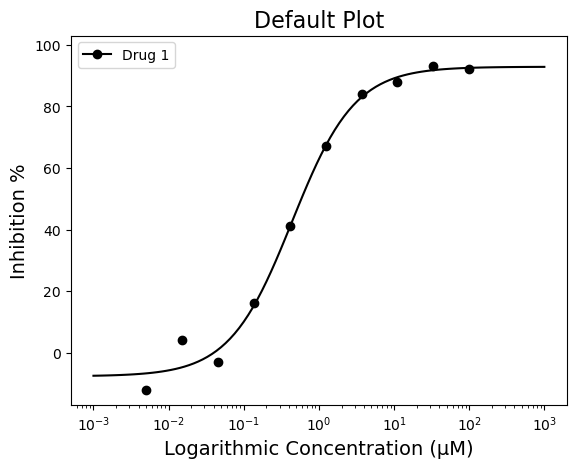

In [6]:
figure = plot_data.single_curve_plot(concentration_col='Compound Conc',
                                     response_col='% Inhibition Avg',
                                     plot_title='Default Plot',
                                     drug_name='Drug 1',
                                     xlabel='Logarithmic Concentration (µM)',
                                     ylabel='Inhibition %',
                                     legend=True,
                                     output_filename=None)

### Customize figure

The above figure looks great! But what if I do not like black for the line color? I would much prefer Teal (#008080). Good news! There are several ways to adjust the graph to highlight the information you want to convey. For colors, we will start with the "line_color=" parameter. The line color can be a specific color name (i.e. red, blue, green, etc) or a hex code. Here is an example of a colored line in "teal" (#008080)

Concentration on X-axis converted to µM


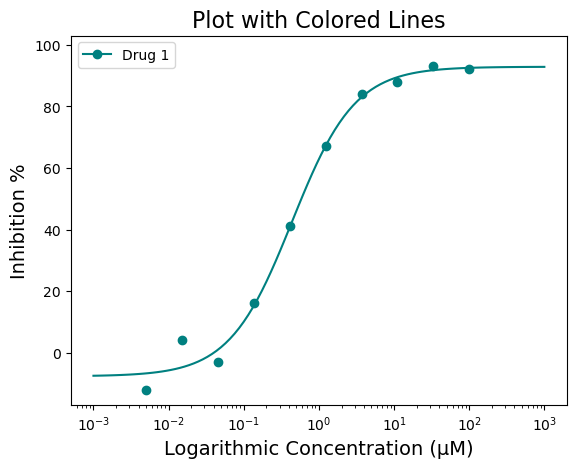

In [7]:
figure = plot_data.single_curve_plot(concentration_col='Compound Conc',
                                     response_col='% Inhibition Avg',
                                     plot_title='Plot with Colored Lines',
                                     drug_name='Drug 1',
                                     xlabel='Logarithmic Concentration (µM)',
                                     ylabel='Inhibition %',
                                     line_color='#008080',
                                     legend=True,
                                     output_filename=None)

That doesn't look half bad! But what if you want to highlight the IC50 value? That would give people a quick way to identify where the IC50 lies on the curve. That can be achieved using the "box=" parameter. The box argument is a boolean argument and by default it will draw a box at the 50% response with respect to the curve.


Concentration on X-axis converted to µM


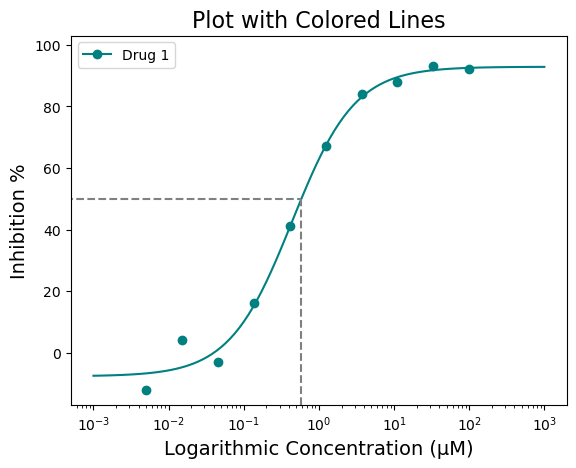

In [8]:
figure = plot_data.single_curve_plot(concentration_col='Compound Conc',
                                     response_col='% Inhibition Avg',
                                     plot_title='Plot with Colored Lines',
                                     drug_name='Drug 1',
                                     xlabel='Logarithmic Concentration (µM)',
                                     ylabel='Inhibition %',
                                     line_color='#008080',
                                     box=True,
                                     legend=True,
                                     output_filename=None)

The box highlight can be further modified for color and specific response position you may be interested in. For example, what if you want the box to be red and also highlight IC$_{60}$ or IC$_{90}$? This can be achieved by using the "box_intercept=" and "box_color=" parameters

Concentration on X-axis converted to µM


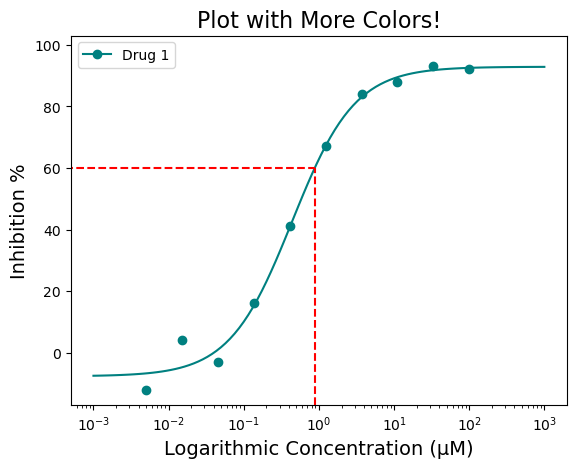

In [9]:
figure = plot_data.single_curve_plot(concentration_col='Compound Conc',
                                     response_col='% Inhibition Avg',
                                     plot_title='Plot with More Colors!',
                                     drug_name='Drug 1',
                                     xlabel='Logarithmic Concentration (µM)',
                                     ylabel='Inhibition %',
                                     line_color='#008080',
                                     box=True,
                                     box_intercept=60,
                                     box_color='red',
                                     legend=True,
                                     output_filename=None)

Finally, the x-axis can be further adjusted. 

The scale can be changed from log to linear using the "xscale=" argument, changing the shape of the curve from sigmoid to a normal curve. The units of the scale can be changed to nM using the "xscale_unit=" argument. Currently only µM and nM is used. 

Concentration on X-axis is in nM
nM with ticks constraints!


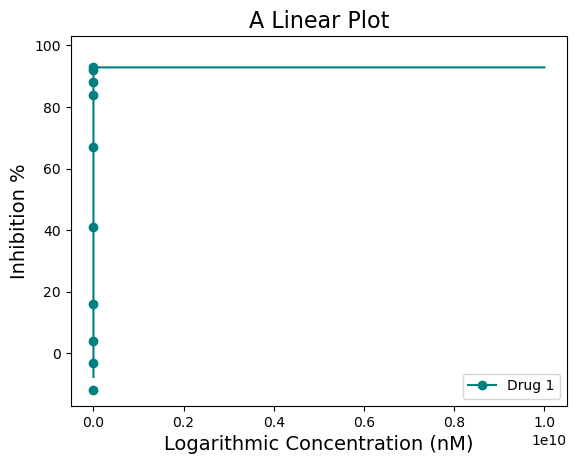

In [10]:
figure = plot_data.single_curve_plot(concentration_col='Compound Conc',
                                     response_col='% Inhibition Avg',
                                     plot_title='A Linear Plot',
                                     drug_name='Drug 1',
                                     xlabel='Logarithmic Concentration (nM)',
                                     ylabel='Inhibition %',
                                     line_color='#008080',
                                     box=False,
                                     legend=True,
                                     xscale='linear',
                                     xscale_unit='nM',
                                     xscale_ticks=(-2.5, 10),
                                     output_filename=None)

For this dataset, the "xscale='linear'" does not look as good. 

Also notice how on the linear plot the xscale_ticks was also adjusted to fit the concentration in nM scale. This was achieved using the "xscale_ticks=" argument. Note that the xscale_ticks will affect how the line curve is drawn and should be adjusted to fit the dataset on the plot. Notice how the plot below has the xscale_ticks ranging from 0 to 2 and how it would affect the resulting curve line. 

Concentration on X-axis is in nM
nM with ticks constraints!


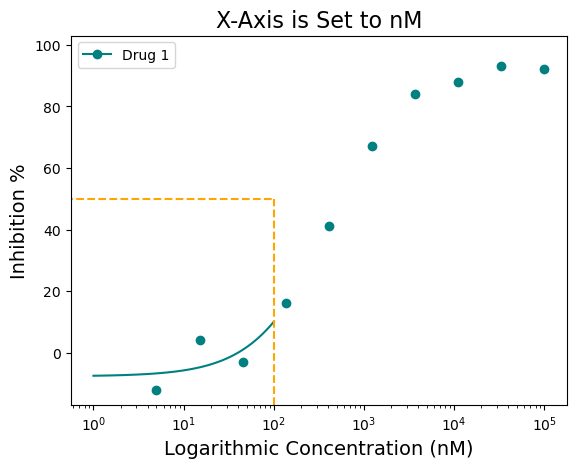

In [11]:
figure = plot_data.single_curve_plot(concentration_col='Compound Conc',
                                     response_col='% Inhibition Avg',
                                     plot_title='X-Axis is Set to nM',
                                     drug_name='Drug 1',
                                     xlabel='Logarithmic Concentration (nM)',
                                     ylabel='Inhibition %',
                                     line_color='#008080',
                                     box=True,
                                     box_color='orange',
                                     legend=True,
                                     xscale='log',
                                     xscale_unit='nM',
                                     xscale_ticks=(0, 2),
                                     output_filename=None)

### Saving the figure
Finally, the figure can be saved using the "output_filename=" argument. Change "None" to file path of choice. Images should be saved in .png format.  

Concentration on X-axis converted to µM
µM with ticks constraints!


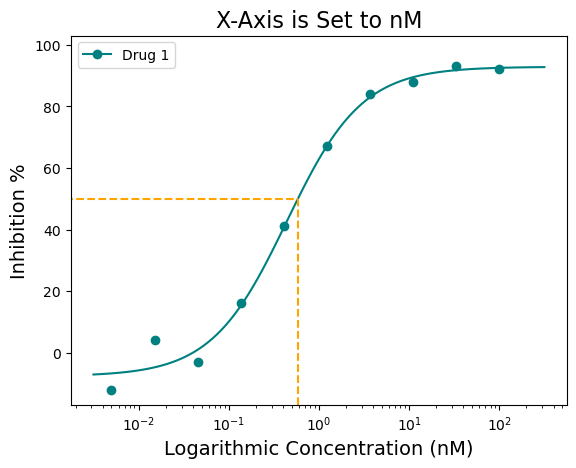

In [12]:
figure = plot_data.single_curve_plot(concentration_col='Compound Conc',
                                     response_col='% Inhibition Avg',
                                     plot_title='X-Axis is Set to nM',
                                     drug_name='Drug 1',
                                     xlabel='Logarithmic Concentration (nM)',
                                     ylabel='Inhibition %',
                                     line_color='#008080',
                                     box=True,
                                     box_color='orange',
                                     legend=True,
                                     xscale='log',
                                     xscale_unit='µM',
                                     xscale_ticks=(-2.5, 2.5),
                                     output_filename=None)

Additionally, the figure can also be saved as follows:

In [13]:
figure.savefig('tutorial_figure_001.png')

And that should be it!

This is my first "big" python project and I learned a lot from it. I know I should clean up the code in the future, but for now, I'm glad to have it up and running! I plan on maintaining this for the foreseeable future. I hope it helps others as much as it has helped me! 